In [1]:
#importing necessary packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#loading train and test dataset
train = pd.read_csv("train_0irEZ2H.csv")
test = pd.read_csv('test_nfaJ3J5.csv')

In [3]:
train.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52


# Overview 

In [4]:
train.shape,test.shape

((150150, 9), (13860, 8))

* 1.5 lacs record its huge dataset a pickle would have been a better option

In [5]:
train.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
units_sold           int64
dtype: object

# Inference
* record_id,total_price,base_price,units_sold data_types is good because the values match the datatypes 
* week's datatype is wrong because column value contains
* store_id,sku_id,is_featured_sku,is_display_sku requires further more investigation to conclude they converted to a category but as of now they look like they can be converted to category



# Action points
* Investigate store_id,sku_id,is_featured_sku,is_display_sku columns

In [6]:
def check_cat_conversion(threshold = 5):
    res = []
    for j,i in enumerate(train.columns):
        val = round((train[i].nunique()/train.shape[0])*100,2)
        
        if val<=threshold and (train[i].dtypes not in ('float64','object')):
            res.append((i,val))
            #df[i] = df[i].astype('category')
        else:
            continue
    return res


In [7]:
check_cat_conversion()

[('store_id', 0.05),
 ('sku_id', 0.02),
 ('is_featured_sku', 0.0),
 ('is_display_sku', 0.0),
 ('units_sold', 0.47)]

# Inference
* unit sold can be skipped 
# action points
* rest all can be converted to type category

In [8]:
train['week'] =pd.to_datetime(train['week'])
train[['week']].head()

,week
0,2011-01-17
1,2011-01-17
2,2011-01-17
3,2011-01-17
4,2011-01-17


In [9]:
train['store_id'] = train['store_id'].astype('category')
train['sku_id'] = train['sku_id'].astype('category')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150150 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   record_ID        150150 non-null  int64         
 1   week             150150 non-null  datetime64[ns]
 2   store_id         150150 non-null  category      
 3   sku_id           150150 non-null  category      
 4   total_price      150149 non-null  float64       
 5   base_price       150150 non-null  float64       
 6   is_featured_sku  150150 non-null  int64         
 7   is_display_sku   150150 non-null  int64         
 8   units_sold       150150 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(2), int64(4)
memory usage: 8.3 MB


# EDA

In [10]:
train.describe()

,record_ID,total_price,base_price,is_featured_sku,is_display_sku,units_sold
count,150150.000000,150149.000000,150150.000000,150150.000000,150150.000000,150150.000000
mean,106271.555504,206.626751,219.425927,0.095611,0.133200,51.674206
std,61386.037861,103.308516,110.961712,0.294058,0.339792,60.207904
min,1.000000,41.325000,61.275000,0.000000,0.000000,1.000000
25%,53111.250000,130.387500,133.237500,0.000000,0.000000,20.000000
50%,106226.500000,198.075000,205.912500,0.000000,0.000000,35.000000
75%,159452.750000,233.700000,234.412500,0.000000,0.000000,62.000000
max,212644.000000,562.162500,562.162500,1.000000,1.000000,2876.000000


# observations
* recordID can be ignored beacuse its basically a no. that identitifies each row uniquely
* is_feartured_sku can be ignored beacuse its a category and for training it is necessary it remains a number
* is_display_sku can be ignored beacuse its a category and for training it is necessary it remains a number
## total_price
* mean > median a slight right skewness will be there in the data and the standard deviation is high so data is not well distributed and mean > standard deviation the normal curve will be a bit flattened and range of the data is 41 to 562
* outliers are present 
## base_price
* mean > median a slight right skewness will be there in the data and the standard deviation is high so data is not well distributed and mean > standard deviation the normal curve will be a bit flattened and range of the data is 61 to 562.
* comparing the ranges of the total_price and base price it is clear that there total_price < base_price which means some items are being sold below base price hence reason can be investigated for this loss in total_price
* outliers are present

## units_sold
* mean > median a right skewness will be there in the data and the standard deviation is high so data is not well distributed and mean < standard deviation the normal curve will be a sharp peak and range of the data is 1 to 2876
* outliers are present

In [11]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        1
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

* only 1 null can be dropped

In [12]:
train.dropna(inplace = True)

In [13]:
train.isnull().sum()

record_ID          0
week               0
store_id           0
sku_id             0
total_price        0
base_price         0
is_featured_sku    0
is_display_sku     0
units_sold         0
dtype: int64

In [14]:
def UVA_numeric(data,var_group):
    """
    Univariate Numerical Anlaysis and plot/print all descriptives and properties along with KDE
    input dataframe, variable group
    returns a loop: calculates all the descriptives of ith variable plots/prints it
    """
    size = len(var_group)
    plt.figure(figsize = (7*size,3),dpi = 140)
    
    #looping each variable group
    for j,i in enumerate(var_group):
        
        #calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        #calculating points of standard_deviation 
        points = mean - st_dev,mean + st_dev
        
        #potting the variable with every piece of information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i],shade = True)
        sns.lineplot(points,[0,0],color = 'black',label = 'std_dev')
        sns.scatterplot([mini,maxi],[0,0],color = 'orange',label ="min/max")
        sns.scatterplot([mean],[0],color = 'red', label = 'mean')
        sns.scatterplot([median],[0],color = 'blue',label = 'median')
        plt.xlabel('{}'.format(i),fontsize=20)
        plt.ylabel('Density')
        plt.title('std_dev = {}; kurtosis = {}; \nskew = {}; range = {}; \nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                         round(kurt,2),
                                                                                                         round(skew,2),
                                                                                                         (round(mini,2),round(maxi,2)),
                                                                                                         round(mean,2),
                                                                                                         round(median,2)))

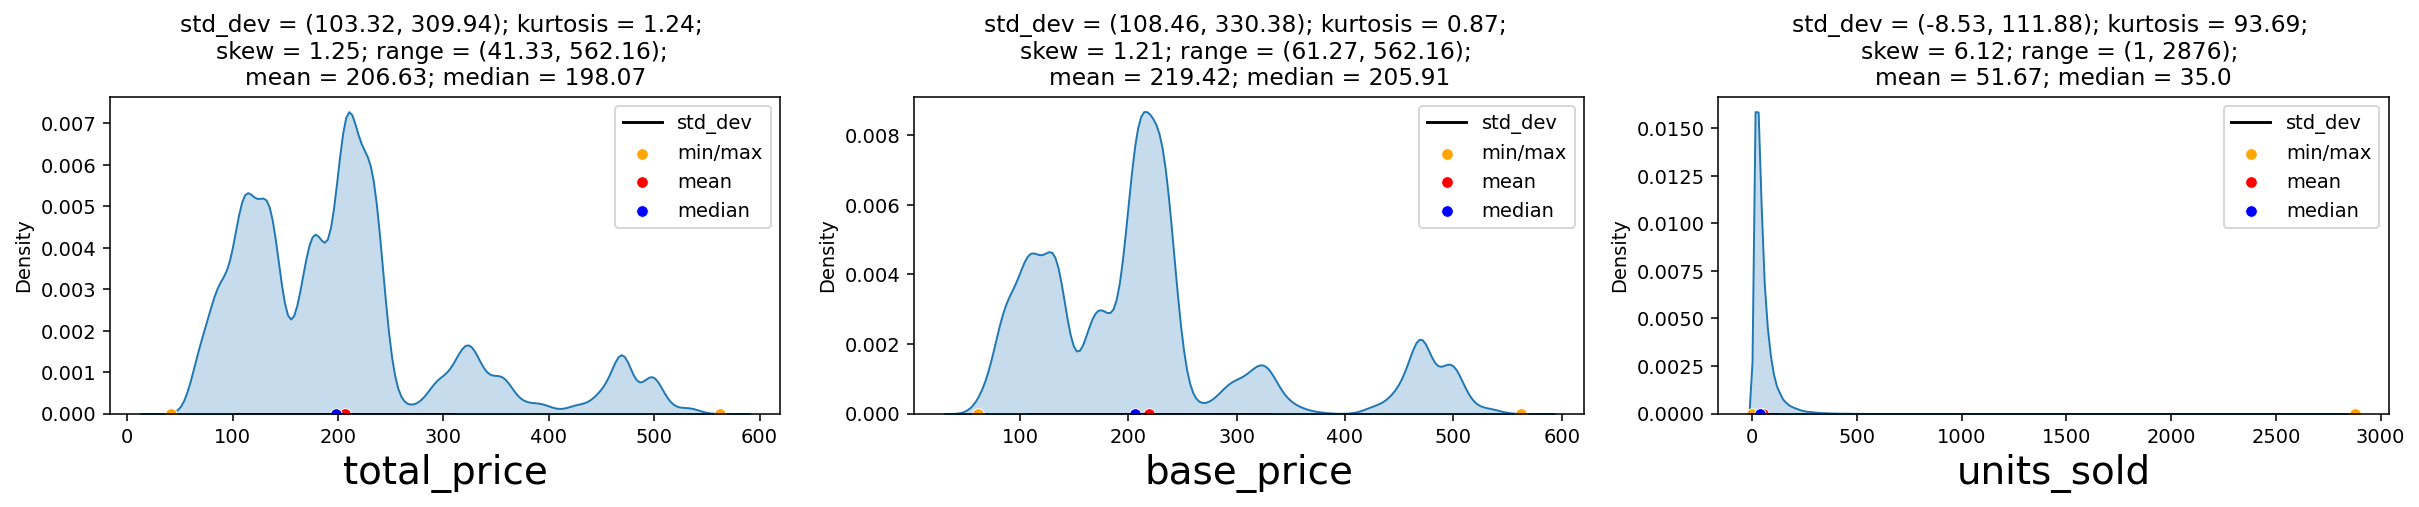

In [15]:
UVA_numeric(train,['total_price','base_price','units_sold'])

# observations
### total price
* clearly it has outliers but these outliers are important can be point of interest cane help further analysis
* skew >0.5: positively/right skewed
* kurtosis > 0: High extreme values are there and fatter tail we can visually verified 
### base price
* clearly it has outliers but these outliers are important can be point of interest cane help further analysis
* skew >0.5: positively/right skewed
* kurtosis > 0: High extreme values are there and fatter tail we can visually verified
### units sold
* clearly outliers are there but visually not able to verify
* skew >>> 0.5 -> positively/right skewed
* kurtosis >>> 0 High extreme values are there and fatter tail we can visually verified

In [16]:
def UVA_outlier(data, var_group, include_outlier = True):
    '''
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    '''

    size = len(var_group)
    plt.figure(figsize = (7*size,4), dpi = 100)
  
    #looping for each variable
    for j,i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = quant25-(1.5*IQR)
        whis_high = quant75+(1.5*IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i]>whis_high])
        outlier_low = len(data[i][data[i]<whis_low])

        if include_outlier == True:
            print(include_outlier)
            #Plotting the variable with every information
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                       round(IQR,2),
                                                                                                       round(med,2),
                                                                                                       (round(quant25,2),round(quant75,2)),
                                                                                                       (outlier_low,outlier_high)
                                                                                                       ))
      
        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i]>whis_high] = whis_high+1
            data2[i][data2[i]<whis_low] = whis_low-1

            # plotting without outliers
            plt.subplot(1,size,j+1)
            sns.boxplot(data=data2[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                       round(IQR,2),
                                                                                                       round(med,2),
                                                                                                       (round(quant25,2),round(quant75,2)),
                                                                                                       (outlier_low,outlier_high)
                                                                                                       ))

True
True
True


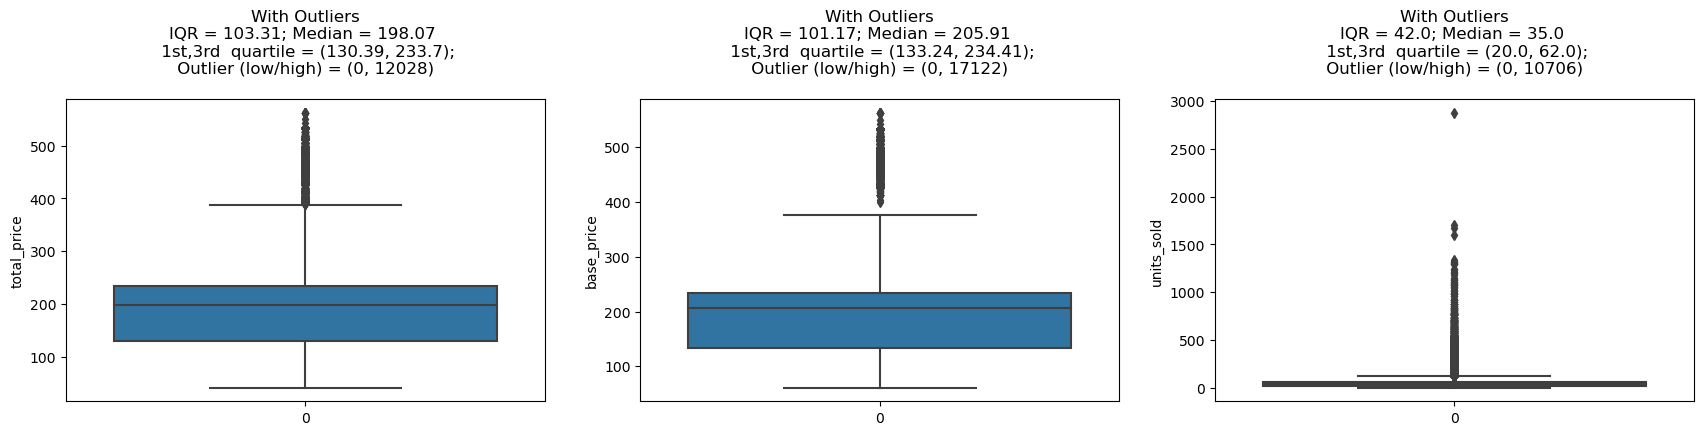

In [17]:
UVA_outlier(train,['total_price','base_price','units_sold'])

* we should remove the outlier from units sold but can because its my target variable

<AxesSubplot:xlabel='units_sold', ylabel='Density'>

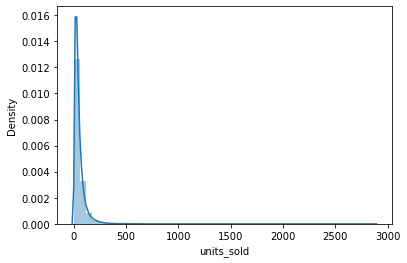

In [18]:
sns.distplot(train['units_sold'])

In [19]:
print(train.shape)

(150149, 9)


# Outlier Removal

In [20]:
Q1 = train['units_sold'].quantile(0.05)
Q3 = train['units_sold'].quantile(0.95)
IQR = Q3 - Q1
train = train[~((train['units_sold'] < (Q1 - 1.5 * IQR)) |(train['units_sold'] > (Q3 + 1.5 * 
IQR)))]

print(train.shape)

(149365, 9)


In [21]:
print(train.shape)

(149365, 9)


In [22]:
def UVA_category(data,var_group):
    """
    Univariate analysis categorical 
    takes a group of variables(category) and plot/print all the value counts and barplot
    """
    #setting figure size
    size = len(var_group)
    plt.figure(figsize = (7*size,5),dpi = 140)
    
    for j,i in enumerate(var_group):
        norm_count =  data[i].value_counts(normalize = True)
        n_uni = data[i].nunique()
        
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count,norm_count.index,order = norm_count.index)
        plt.xlabel('fraction/percent',fontsize = 20)
        plt.ylabel('{}'.format(i),fontsize=20)
        plt.title('n_uniques = {} \n value counts \n{};'.format(n_uni,norm_count))

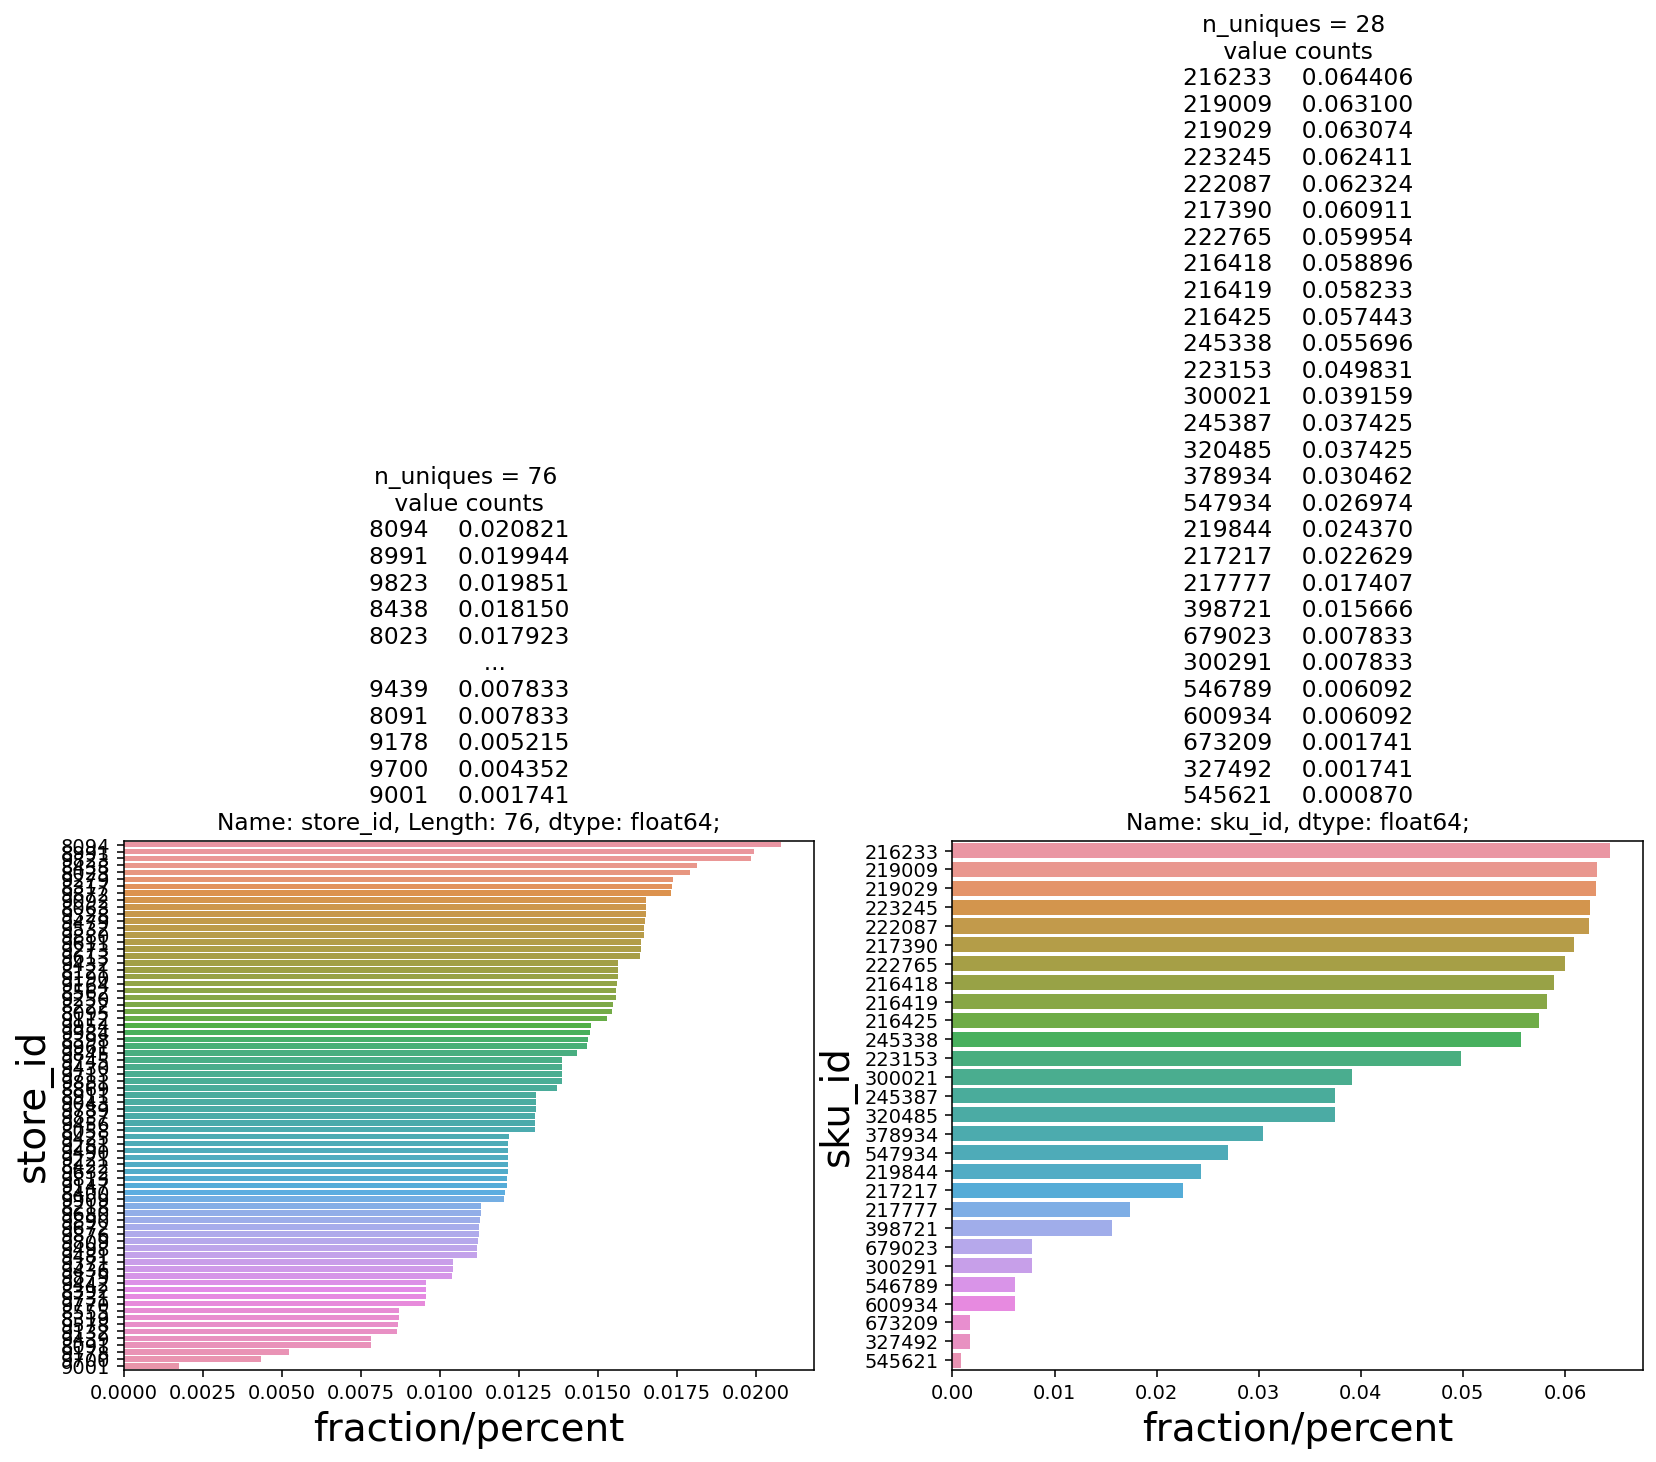

In [23]:
UVA_category(train,['store_id','sku_id'])

<AxesSubplot:>

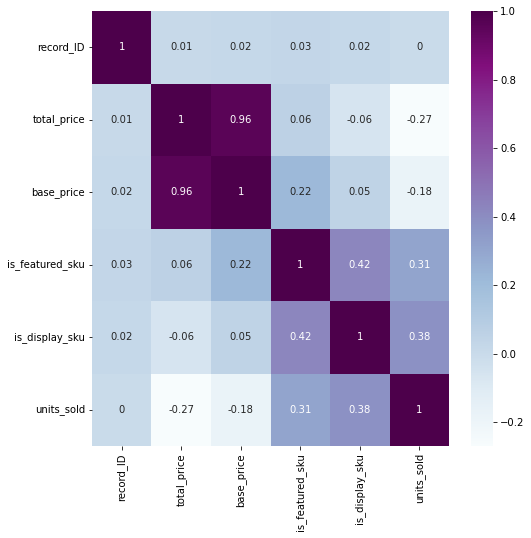

In [24]:
plt.figure(figsize=(8,8))
correlation =round(train.corr(method = 'pearson'),2)
sns.heatmap(correlation,cmap='BuPu',annot = True)


In [25]:
train.dtypes

record_ID                   int64
week               datetime64[ns]
store_id                 category
sku_id                   category
total_price               float64
base_price                float64
is_featured_sku             int64
is_display_sku              int64
units_sold                  int64
dtype: object

* either total_price or base price can be dropped becasue it has a higher correlation approximately = 1

In [26]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [27]:
X = train.iloc[:,4:-1]
calc_vif(X)

,variables,VIF
0,total_price,92.678607
1,base_price,98.346132
2,is_featured_sku,1.774597
3,is_display_sku,1.409043


* in the VIF test base price and total proce they failed the test one of them i.e base price can be dropped easily

In [28]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(X, axis=0)

array([0.22535307, 0.22204962, 1.22733246, 1.21384425])

* total price and base price has postive autocorrelation
* drop week column after extracting important features
* drop record id and base price


In [29]:
train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12


# Feature Extraction

In [30]:
train['month'] = train['week'].apply(lambda x:x.month) 
#train['day'] = train['week'].apply(lambda x:x.day)
#train['year'] = train['week'].apply(lambda x:x.year)  
#train['week_of_year'] = train['week'].apply(lambda x:x.weekofyear)
train['day_of_week'] = train['week'].apply(lambda x:x.dayofweek)
train['Weekday'] = np.where(train['day_of_week']>4,1,0)

train

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,month,day_of_week,Weekday
0,1,2011-01-17,8091,216418,99.0375,111.8625,0,0,20,1,0,0
1,2,2011-01-17,8091,216419,99.0375,99.0375,0,0,28,1,0,0
2,3,2011-01-17,8091,216425,133.9500,133.9500,0,0,19,1,0,0
3,4,2011-01-17,8091,216233,133.9500,133.9500,0,0,44,1,0,0
4,5,2011-01-17,8091,217390,141.0750,141.0750,0,0,52,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,2013-09-07,9984,223245,235.8375,235.8375,0,0,38,9,5,1
150146,212639,2013-09-07,9984,223153,235.8375,235.8375,0,0,30,9,5,1
150147,212642,2013-09-07,9984,245338,357.6750,483.7875,1,1,31,9,5,1
150148,212643,2013-09-07,9984,547934,141.7875,191.6625,0,1,12,9,5,1


# Implementing the action points
* removed week,record and base price

In [31]:
train.drop(['record_ID','week','base_price'],axis = 1,inplace = True)
train

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,units_sold,month,day_of_week,Weekday
0,8091,216418,99.0375,0,0,20,1,0,0
1,8091,216419,99.0375,0,0,28,1,0,0
2,8091,216425,133.9500,0,0,19,1,0,0
3,8091,216233,133.9500,0,0,44,1,0,0
4,8091,217390,141.0750,0,0,52,1,0,0
...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,0,0,38,9,5,1
150146,9984,223153,235.8375,0,0,30,9,5,1
150147,9984,245338,357.6750,1,1,31,9,5,1
150148,9984,547934,141.7875,0,1,12,9,5,1


In [32]:
train = train.reindex(columns=['store_id', 'sku_id', 'total_price', 'is_featured_sku','is_display_sku','month',
                               'day_of_week','Weekday','units_sold'])
train

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday,units_sold
0,8091,216418,99.0375,0,0,1,0,0,20
1,8091,216419,99.0375,0,0,1,0,0,28
2,8091,216425,133.9500,0,0,1,0,0,19
3,8091,216233,133.9500,0,0,1,0,0,44
4,8091,217390,141.0750,0,0,1,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,9984,223245,235.8375,0,0,9,5,1,38
150146,9984,223153,235.8375,0,0,9,5,1,30
150147,9984,245338,357.6750,1,1,9,5,1,31
150148,9984,547934,141.7875,0,1,9,5,1,12


<AxesSubplot:xlabel='total_price', ylabel='Density'>

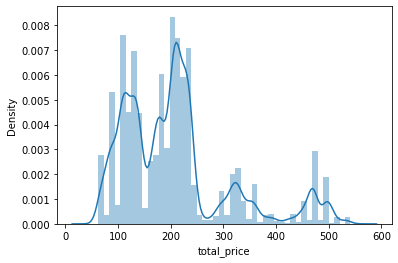

In [33]:
sns.distplot(train['total_price'])

In [34]:
train['total_price'] = train['total_price'].apply(lambda x:np.log(x))
train['units_sold'] = train['units_sold'].apply(lambda x:np.log(x))

In [35]:
train

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday,units_sold
0,8091,216418,4.595499,0,0,1,0,0,2.995732
1,8091,216419,4.595499,0,0,1,0,0,3.332205
2,8091,216425,4.897467,0,0,1,0,0,2.944439
3,8091,216233,4.897467,0,0,1,0,0,3.784190
4,8091,217390,4.949292,0,0,1,0,0,3.951244
...,...,...,...,...,...,...,...,...,...
150145,9984,223245,5.463143,0,0,9,5,1,3.637586
150146,9984,223153,5.463143,0,0,9,5,1,3.401197
150147,9984,245338,5.879625,1,1,9,5,1,3.433987
150148,9984,547934,4.954329,0,1,9,5,1,2.484907


In [36]:
train.dtypes

store_id           category
sku_id             category
total_price         float64
is_featured_sku       int64
is_display_sku        int64
month                 int64
day_of_week           int64
Weekday               int32
units_sold          float64
dtype: object

In [37]:
train['store_id'] = train['store_id'].astype('int64')
train['sku_id'] = train['sku_id'].astype('int64')

In [38]:
train.dtypes

store_id             int64
sku_id               int64
total_price        float64
is_featured_sku      int64
is_display_sku       int64
month                int64
day_of_week          int64
Weekday              int32
units_sold         float64
dtype: object

# Data Eyeballing on test data

In [39]:
test.head()

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
0,212645,16/07/13,8091,216418,108.3000,108.3000,0,0
1,212646,16/07/13,8091,216419,109.0125,109.0125,0,0
2,212647,16/07/13,8091,216425,133.9500,133.9500,0,0
3,212648,16/07/13,8091,216233,133.9500,133.9500,0,0
4,212649,16/07/13,8091,217390,176.7000,176.7000,0,0


In [40]:
test.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
dtype: object

In [41]:
test.describe()

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku
count,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000,13860.000000
mean,222460.146392,9199.422511,254761.132468,212.188874,223.922660,0.086580,0.133333
std,5668.258490,615.611603,85550.107852,93.138162,103.429522,0.281229,0.339947
min,212645.000000,8023.000000,216233.000000,65.550000,70.537500,0.000000,0.000000
25%,217557.750000,8562.000000,217217.000000,132.525000,137.512500,0.000000,0.000000
50%,222466.500000,9371.000000,222087.000000,213.037500,218.737500,0.000000,0.000000
75%,227367.250000,9731.000000,245338.000000,241.537500,261.487500,0.000000,0.000000
max,232287.000000,9984.000000,679023.000000,562.162500,562.162500,1.000000,1.000000


# Action points
* change the datatypes of week,store_ID and sku_id
* Extract features from week column
* drop record_ID,week,base price, 

In [42]:
test.dtypes

record_ID            int64
week                object
store_id             int64
sku_id               int64
total_price        float64
base_price         float64
is_featured_sku      int64
is_display_sku       int64
dtype: object

In [43]:
test['week'] =pd.to_datetime(test['week'])
test[['week']].head()

,week
0,2013-07-16
1,2013-07-16
2,2013-07-16
3,2013-07-16
4,2013-07-16


In [44]:
test['month'] = test['week'].apply(lambda x:x.month) 
#test['day'] = test['week'].apply(lambda x:x.day)
#test['year'] = test['week'].apply(lambda x:x.year)  
#test['week_of_year'] = test['week'].apply(lambda x:x.weekofyear)
test['day_of_week'] = test['week'].apply(lambda x:x.dayofweek)
test['Weekday'] = np.where(test['day_of_week']>4,1,0)

test

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday
0,212645,2013-07-16,8091,216418,108.3000,108.3000,0,0,7,1,0
1,212646,2013-07-16,8091,216419,109.0125,109.0125,0,0,7,1,0
2,212647,2013-07-16,8091,216425,133.9500,133.9500,0,0,7,1,0
3,212648,2013-07-16,8091,216233,133.9500,133.9500,0,0,7,1,0
4,212649,2013-07-16,8091,217390,176.7000,176.7000,0,0,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...
13855,232281,2013-01-10,9984,223245,241.5375,241.5375,0,0,1,3,0
13856,232282,2013-01-10,9984,223153,240.8250,240.8250,0,0,1,3,0
13857,232285,2013-01-10,9984,245338,382.6125,401.8500,1,1,1,3,0
13858,232286,2013-01-10,9984,547934,191.6625,191.6625,0,0,1,3,0


In [45]:
test.drop(['record_ID','week','base_price'],axis = 1,inplace = True)
test

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday
0,8091,216418,108.3000,0,0,7,1,0
1,8091,216419,109.0125,0,0,7,1,0
2,8091,216425,133.9500,0,0,7,1,0
3,8091,216233,133.9500,0,0,7,1,0
4,8091,217390,176.7000,0,0,7,1,0
...,...,...,...,...,...,...,...,...
13855,9984,223245,241.5375,0,0,1,3,0
13856,9984,223153,240.8250,0,0,1,3,0
13857,9984,245338,382.6125,1,1,1,3,0
13858,9984,547934,191.6625,0,0,1,3,0


# Data Preprocessing
## Encoding

## Feature Scaling

In [46]:
train

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday,units_sold
0,8091,216418,4.595499,0,0,1,0,0,2.995732
1,8091,216419,4.595499,0,0,1,0,0,3.332205
2,8091,216425,4.897467,0,0,1,0,0,2.944439
3,8091,216233,4.897467,0,0,1,0,0,3.784190
4,8091,217390,4.949292,0,0,1,0,0,3.951244
...,...,...,...,...,...,...,...,...,...
150145,9984,223245,5.463143,0,0,9,5,1,3.637586
150146,9984,223153,5.463143,0,0,9,5,1,3.401197
150147,9984,245338,5.879625,1,1,9,5,1,3.433987
150148,9984,547934,4.954329,0,1,9,5,1,2.484907


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149365 entries, 0 to 150149
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   store_id         149365 non-null  int64  
 1   sku_id           149365 non-null  int64  
 2   total_price      149365 non-null  float64
 3   is_featured_sku  149365 non-null  int64  
 4   is_display_sku   149365 non-null  int64  
 5   month            149365 non-null  int64  
 6   day_of_week      149365 non-null  int64  
 7   Weekday          149365 non-null  int32  
 8   units_sold       149365 non-null  float64
dtypes: float64(2), int32(1), int64(6)
memory usage: 10.8 MB


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13860 entries, 0 to 13859
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   store_id         13860 non-null  int64  
 1   sku_id           13860 non-null  int64  
 2   total_price      13860 non-null  float64
 3   is_featured_sku  13860 non-null  int64  
 4   is_display_sku   13860 non-null  int64  
 5   month            13860 non-null  int64  
 6   day_of_week      13860 non-null  int64  
 7   Weekday          13860 non-null  int32  
dtypes: float64(1), int32(1), int64(6)
memory usage: 812.2 KB


In [49]:
test

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday
0,8091,216418,108.3000,0,0,7,1,0
1,8091,216419,109.0125,0,0,7,1,0
2,8091,216425,133.9500,0,0,7,1,0
3,8091,216233,133.9500,0,0,7,1,0
4,8091,217390,176.7000,0,0,7,1,0
...,...,...,...,...,...,...,...,...
13855,9984,223245,241.5375,0,0,1,3,0
13856,9984,223153,240.8250,0,0,1,3,0
13857,9984,245338,382.6125,1,1,1,3,0
13858,9984,547934,191.6625,0,0,1,3,0


In [50]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train[['store_id','sku_id']] =train[['store_id','sku_id']].apply(le.fit_transform)
test[['store_id','sku_id']] =test[['store_id','sku_id']].apply(le.fit_transform)


In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

train.iloc[:, :8] = sc.fit_transform(train.iloc[:, :8])
test.iloc[:, :8] = sc.fit_transform(test.iloc[:, :8])

In [52]:
train

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday,units_sold
0,-1.519569,-1.313337,-1.318007,-0.317754,-0.386539,-1.493500,-0.782145,-0.347604,2.995732
1,-1.519569,-1.161793,-1.318007,-0.317754,-0.386539,-1.493500,-0.782145,-0.347604,3.332205
2,-1.519569,-1.010249,-0.680107,-0.317754,-0.386539,-1.493500,-0.782145,-0.347604,2.944439
3,-1.519569,-1.464881,-0.680107,-0.317754,-0.386539,-1.493500,-0.782145,-0.347604,3.784190
4,-1.519569,-0.707162,-0.570627,-0.317754,-0.386539,-1.493500,-0.782145,-0.347604,3.951244
...,...,...,...,...,...,...,...,...,...
150145,1.697436,0.505190,0.514871,-0.317754,-0.386539,0.834492,2.009029,2.876835,3.637586
150146,1.697436,0.353646,0.514871,-0.317754,-0.386539,0.834492,2.009029,2.876835,3.401197
150147,1.697436,0.656734,1.394679,3.147085,2.587061,0.834492,2.009029,2.876835,3.433987
150148,1.697436,2.172173,-0.559985,-0.317754,2.587061,0.834492,2.009029,2.876835,2.484907


# splitting the training dataset into test and train to check the model performance

In [53]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [54]:
X

array([[-1.51956943, -1.31333724, -1.31800682, ..., -1.49350013,
        -0.78214537, -0.34760428],
       [-1.51956943, -1.16179334, -1.31800682, ..., -1.49350013,
        -0.78214537, -0.34760428],
       [-1.51956943, -1.01024943, -0.68010662, ..., -1.49350013,
        -0.78214537, -0.34760428],
       ...,
       [ 1.69743645,  0.65673355,  1.39467889, ...,  0.83449202,
         2.00902855,  2.87683452],
       [ 1.69743645,  2.17217263, -0.55998519, ...,  0.83449202,
         2.00902855,  2.87683452],
       [ 1.69743645,  2.62680435,  0.50206829, ...,  0.83449202,
         2.00902855,  2.87683452]])

In [55]:
y

array([2.99573227, 3.33220451, 2.94443898, ..., 3.4339872 , 2.48490665,
       2.7080502 ])

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [57]:
print(X_train,y_train)

[[ 1.20594944 -0.85870552  0.90427157 ...  0.25249398  2.56726333
   2.87683452]
 [-1.43020816 -1.46488115 -0.73705012 ...  0.83449202  2.00902855
   2.87683452]
 [-0.08978904 -0.55561771  0.44347506 ... -0.03850504 -0.22391058
  -0.34760428]
 ...
 [ 0.40169797  0.95982137 -1.64618089 ...  1.41649006 -0.78214537
  -0.34760428]
 [ 0.17829478 -1.31333724 -1.68198643 ... -1.20250111 -0.78214537
  -0.34760428]
 [-0.13446968  0.20210183 -0.07801092 ... -0.32950405  1.45079377
  -0.34760428]] [3.49650756 4.30406509 2.94443898 ... 0.69314718 2.83321334 3.8501476 ]


In [58]:
print(X_test,y_test)

[[-0.53659541 -0.4040738  -0.01147075 ... -1.20250111 -0.78214537
  -0.34760428]
 [-0.26851159 -1.01024943 -0.66889982 ...  1.12549104 -0.78214537
  -0.34760428]
 [ 1.1612688  -1.31333724 -1.19979551 ...  0.25249398  2.56726333
   2.87683452]
 ...
 [-0.53659541 -1.16179334 -1.68198643 ... -0.32950405  2.56726333
   2.87683452]
 [-1.65361135 -1.16179334 -1.1712481  ...  0.83449202 -0.78214537
  -0.34760428]
 [-0.35787286 -0.70716161 -0.26335727 ...  0.543493   -0.78214537
  -0.34760428]] [3.63758616 3.4339872  5.0369526  ... 2.94443898 5.30330491 3.98898405]


In [59]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred_train = regressor.predict(X_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_pred_train))

0.2523957745863895


In [61]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[3.48 3.64]
 [3.79 3.43]
 [3.87 5.04]
 ...
 [3.89 2.94]
 [3.88 5.3 ]
 [3.64 3.99]]


In [62]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.253005124639322


In [63]:
from sklearn.metrics import mean_squared_log_error as MSLE


train_rmsle = np.sqrt(MSLE(y_train,y_pred_train))

test_rmsle = np.sqrt(MSLE(y_test,y_pred))
print('TRAIN RMSLE VALUE',train_rmsle)
print('TEST RMSLE VALUE',test_rmsle)

TRAIN RMSLE VALUE 0.1938799411804158
TEST RMSLE VALUE 0.19229047068056682


In [64]:
given_x_test = test
given_x_test

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday
0,-1.518989,-1.315243,-1.115468,-0.307875,-0.392232,0.033806,-0.612056,-0.447214
1,-1.518989,-1.163408,-1.107818,-0.307875,-0.392232,0.033806,-0.612056,-0.447214
2,-1.518989,-1.011573,-0.840061,-0.307875,-0.392232,0.033806,-0.612056,-0.447214
3,-1.518989,-1.467077,-0.840061,-0.307875,-0.392232,0.033806,-0.612056,-0.447214
4,-1.518989,-0.707904,-0.381048,-0.307875,-0.392232,0.033806,-0.612056,-0.447214
...,...,...,...,...,...,...,...,...
13855,1.696548,0.506773,0.315120,-0.307875,-0.392232,-2.400238,0.723339,-0.447214
13856,1.696548,0.354938,0.307470,-0.307875,-0.392232,-2.400238,0.723339,-0.447214
13857,1.696548,0.658607,1.829860,3.248076,2.549510,-2.400238,0.723339,-0.447214
13858,1.696548,2.176953,-0.220394,-0.307875,-0.392232,-2.400238,0.723339,-0.447214


In [65]:
given_y_pred = regressor.predict(given_x_test)

In [66]:
given_x_test['predicted_units_sold'] = given_y_pred
given_x_test

,store_id,sku_id,total_price,is_featured_sku,is_display_sku,month,day_of_week,Weekday,predicted_units_sold
0,-1.518989,-1.315243,-1.115468,-0.307875,-0.392232,0.033806,-0.612056,-0.447214,3.875435
1,-1.518989,-1.163408,-1.107818,-0.307875,-0.392232,0.033806,-0.612056,-0.447214,3.840037
2,-1.518989,-1.011573,-0.840061,-0.307875,-0.392232,0.033806,-0.612056,-0.447214,3.765132
3,-1.518989,-1.467077,-0.840061,-0.307875,-0.392232,0.033806,-0.612056,-0.447214,3.867841
4,-1.518989,-0.707904,-0.381048,-0.307875,-0.392232,0.033806,-0.612056,-0.447214,3.626942
...,...,...,...,...,...,...,...,...,...
13855,1.696548,0.506773,0.315120,-0.307875,-0.392232,-2.400238,0.723339,-0.447214,3.126340
13856,1.696548,0.354938,0.307470,-0.307875,-0.392232,-2.400238,0.723339,-0.447214,3.161738
13857,1.696548,0.658607,1.829860,3.248076,2.549510,-2.400238,0.723339,-0.447214,4.046633
13858,1.696548,2.176953,-0.220394,-0.307875,-0.392232,-2.400238,0.723339,-0.447214,2.831075


# additionally we improve the model performance by Xgboost

In [67]:
from xgboost import XGBRFRegressor
regressor = XGBRFRegressor()
regressor.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)

In [68]:
y_predxg_train = regressor.predict(X_train)
from sklearn.metrics import r2_score
print(r2_score(y_train, y_predxg_train))

0.4185540153578525


In [69]:
y_predxg_test = regressor.predict(X_test)

In [70]:
from sklearn.metrics import mean_squared_log_error as MSLE


train_rmsle = np.sqrt(MSLE(y_train,y_predxg_train))

test_rmsle = np.sqrt(MSLE(y_test,y_predxg_test))
print('TRAIN RMSLE VALUE',train_rmsle)
print('TEST RMSLE VALUE',test_rmsle)

TRAIN RMSLE VALUE 0.17503005776901084
TEST RMSLE VALUE 0.17356166684436486


In [ ]:
### Encoding -> 

In [ ]:
1. Extract atleast 5 new features from week 
2. Drop record_id, week
3. Label encode extracted week columns, skuid, storeid
4. Scaling on skuid, storeid #extracted week columns
5. Convert is featuresku and isdisplaysku -> Number 
a. Do check for outliers. (Extreme outliers correction)
b. Correlations -> Take action (VIF)
c. Autocorrelation -> Durbinwatson test. --> lag/lead shifts. Moving average 

6. 9 features (x) -> unit sold (y) -> Linear model 